# 1.환경 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
def svc_visualize(x, y, model, title=''):
    xx, yy = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 50), 
                         np.linspace(x[:, 1].min(), x[:, 1].max(), 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], 
                colors=['gray', 'red', 'gray'],
                linestyles=['--', '-', '--'])
    plt.title(title)
    plt.axis('tight')
    plt.show()

# 2.SVM 기본 개념

**1) 데이터 만들고 시각화**

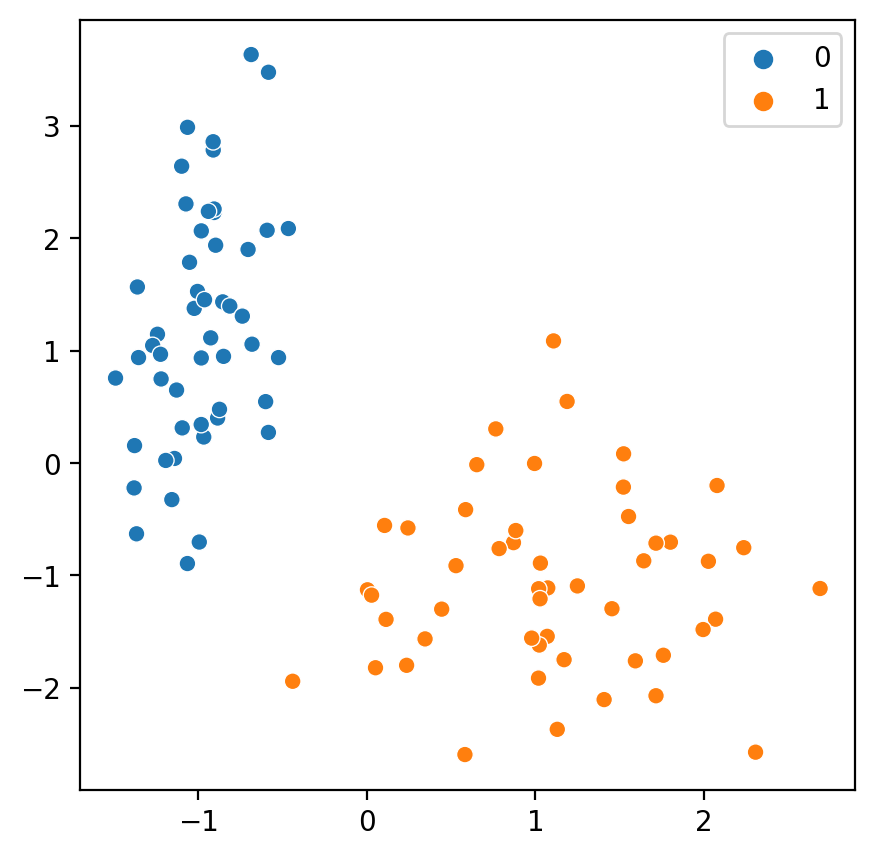

In [3]:
# 데이터 만들기
from sklearn.datasets import make_moons, make_classification

seed = 903
x, y = make_classification(n_samples=100,
                           n_features=2, 
                           n_redundant=0, 
                           weights=[0.5, 0.5],
                           n_clusters_per_class=1, 
                           random_state=seed)

# 시각화
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.show()

**2) 모델링 후 시각화**

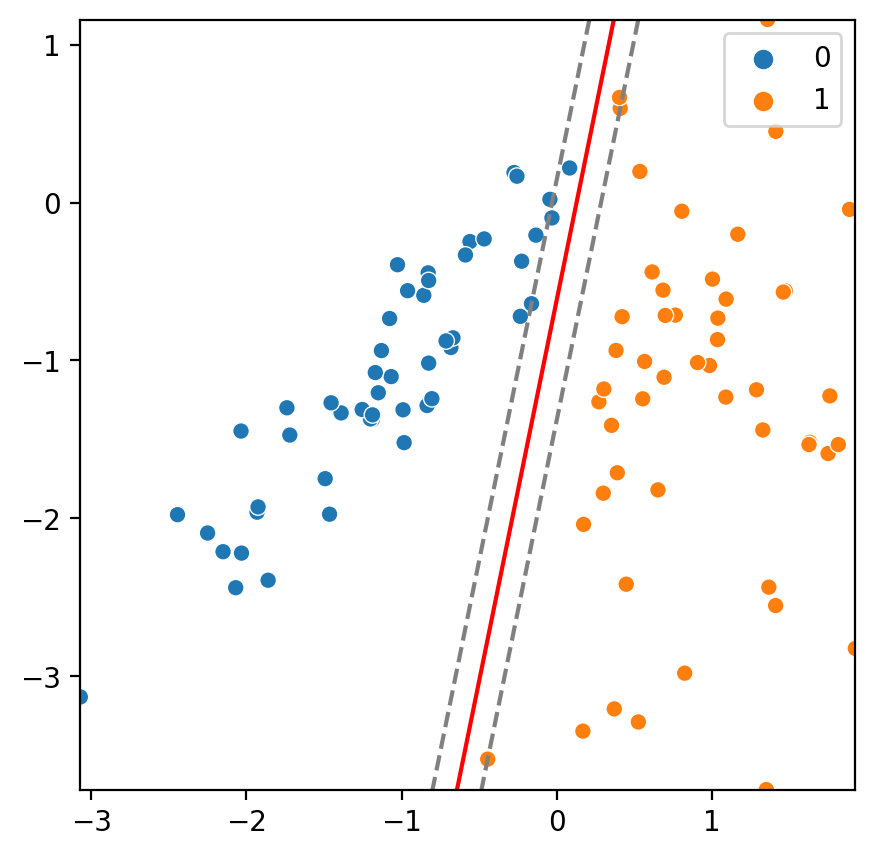

In [10]:
# 불러오기
from sklearn.svm import SVC

# 모델링
model = SVC(kernel='linear', C=10)
model.fit(x, y)

# 시각화
svc_visualize(x, y, model)

# 3.결정 경계와 마진 이해

**1) 데이터 만들고 시각화**

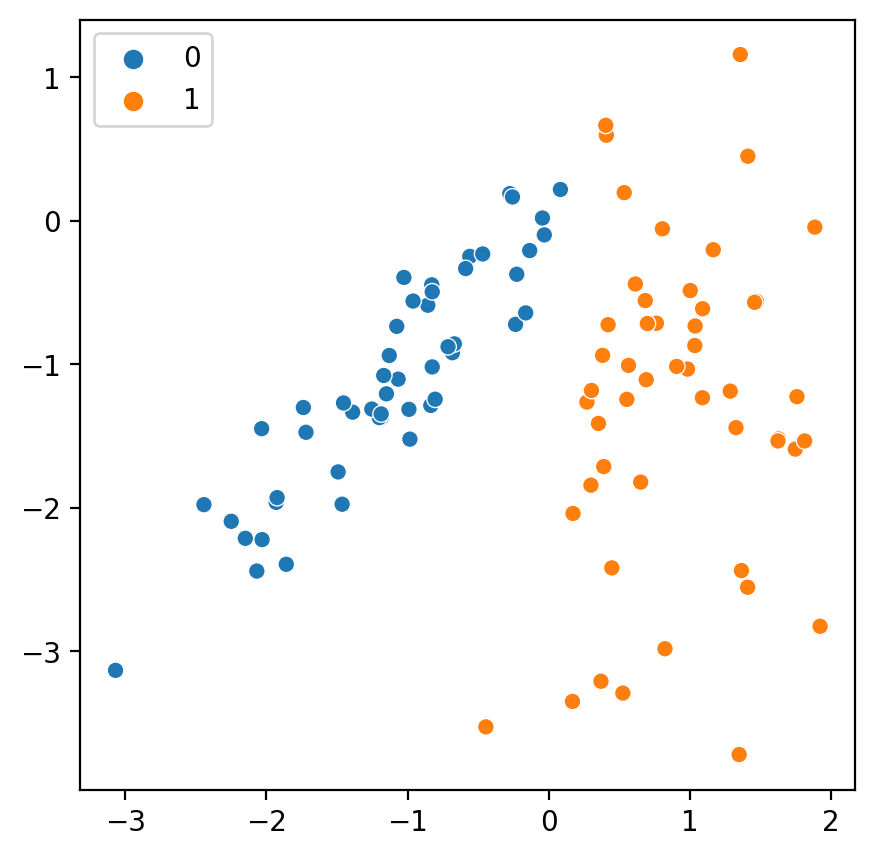

In [11]:
# 데이터 만들기
seed = 874
x, y = make_classification(n_features=2, 
                           n_redundant=0, 
                           weights=[0.5, 0.5],
                           n_clusters_per_class=1, 
                           random_state=seed)

# 시각화
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.show()

**2) cost 값 변경**

* cost 값을 0.1, ~ 40 사이의 숫자로 변경하면서 cost에 다른 모델보기

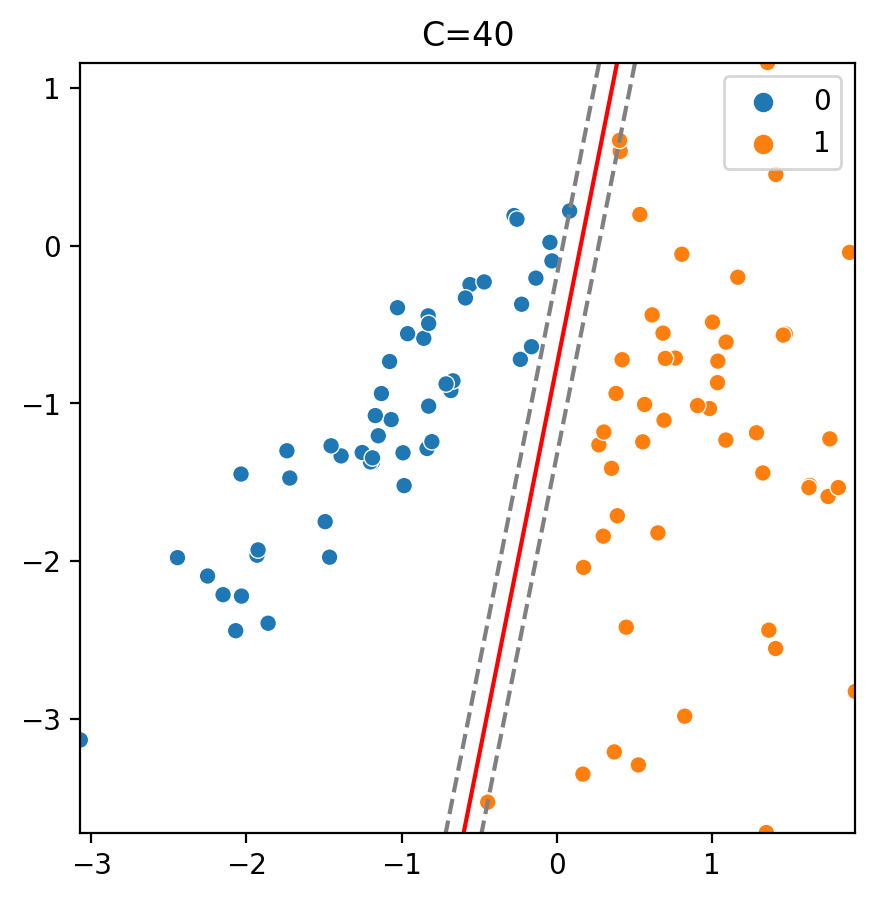

In [15]:
# cost 값
cost = 40

# 모델링
model = SVC(kernel='linear', C=cost)
model.fit(x, y)

# 시각화
svc_visualize(x, y, model, f'C={cost}')

# 4.선형경계로 분류할 수 없는 경우

**1) 데이터 만들고 시각화**

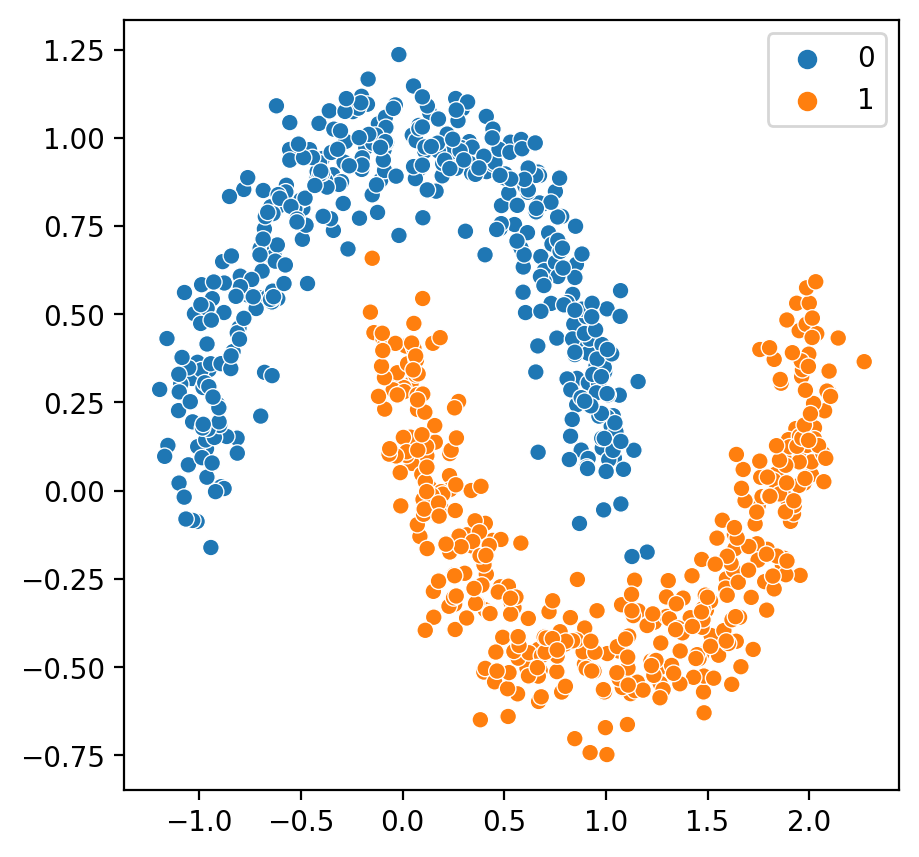

In [16]:
# 데이터 반들기
x, y = make_moons(n_samples=800, noise=.1, random_state=10)

# 시각화
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.show()

**2) 선형경계로 분류**

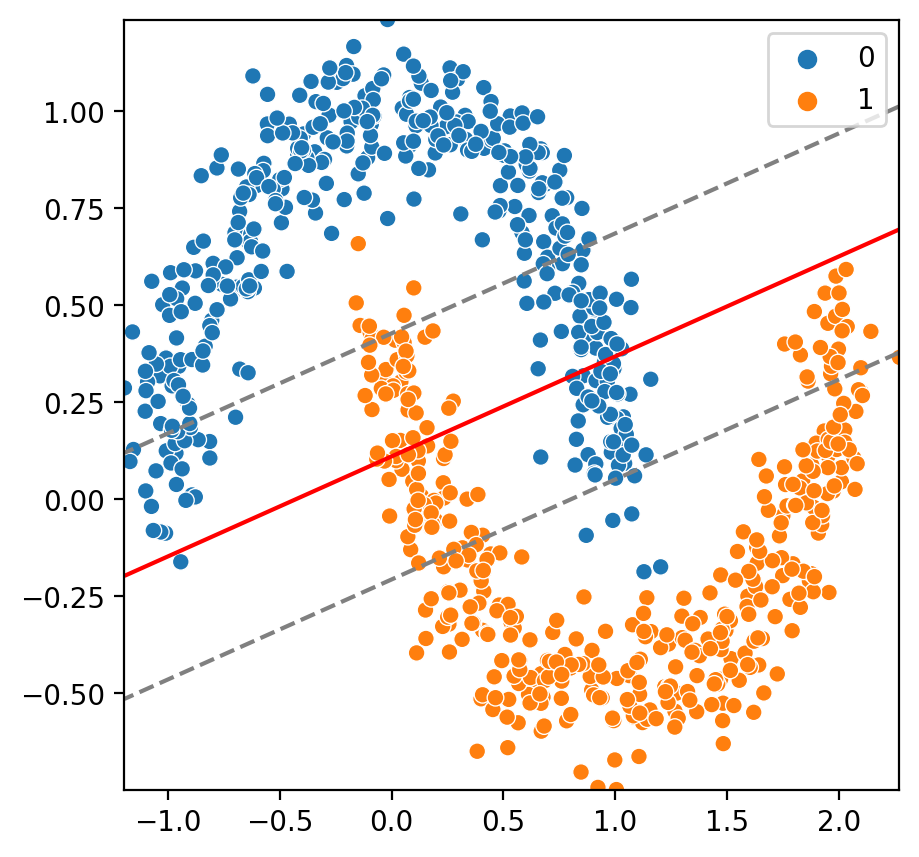

In [17]:
# 모델링
model = SVC(kernel='linear')
model.fit(x, y)

# 시각화
svc_visualize(x, y, model)

**3) 커널 트릭 사용: poly**

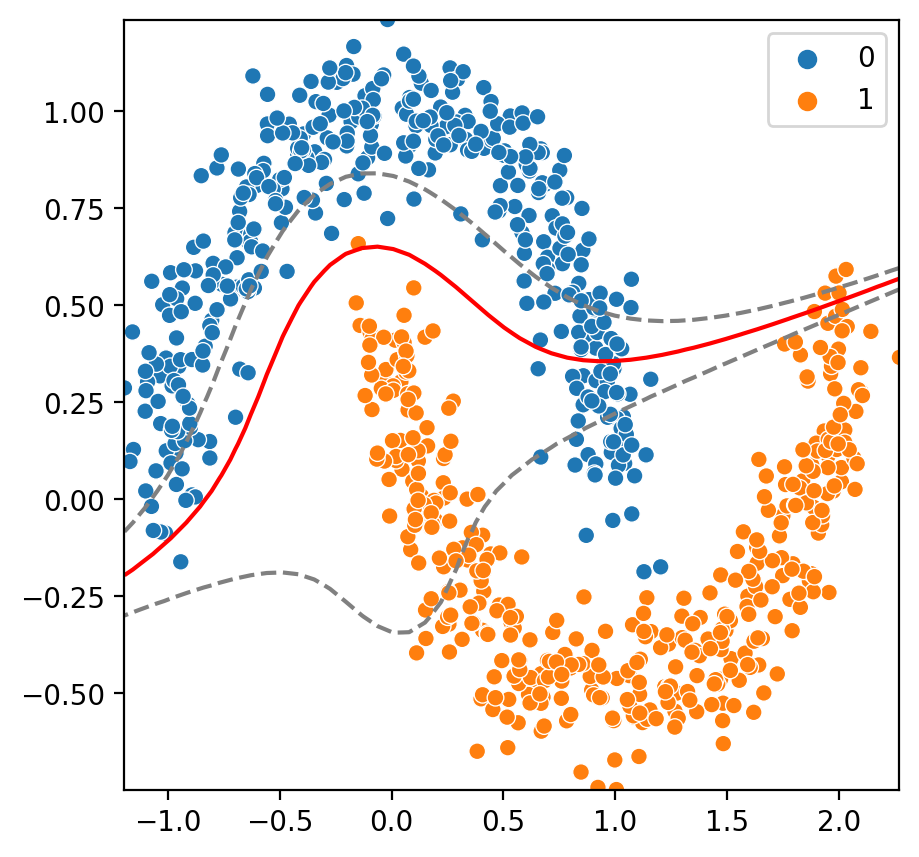

In [18]:
# 모델링
model = SVC(kernel='poly', C=1)
model.fit(x, y)

# 시각화
svc_visualize(x, y, model)

**4) 커널 트릭 사용 : rbf**

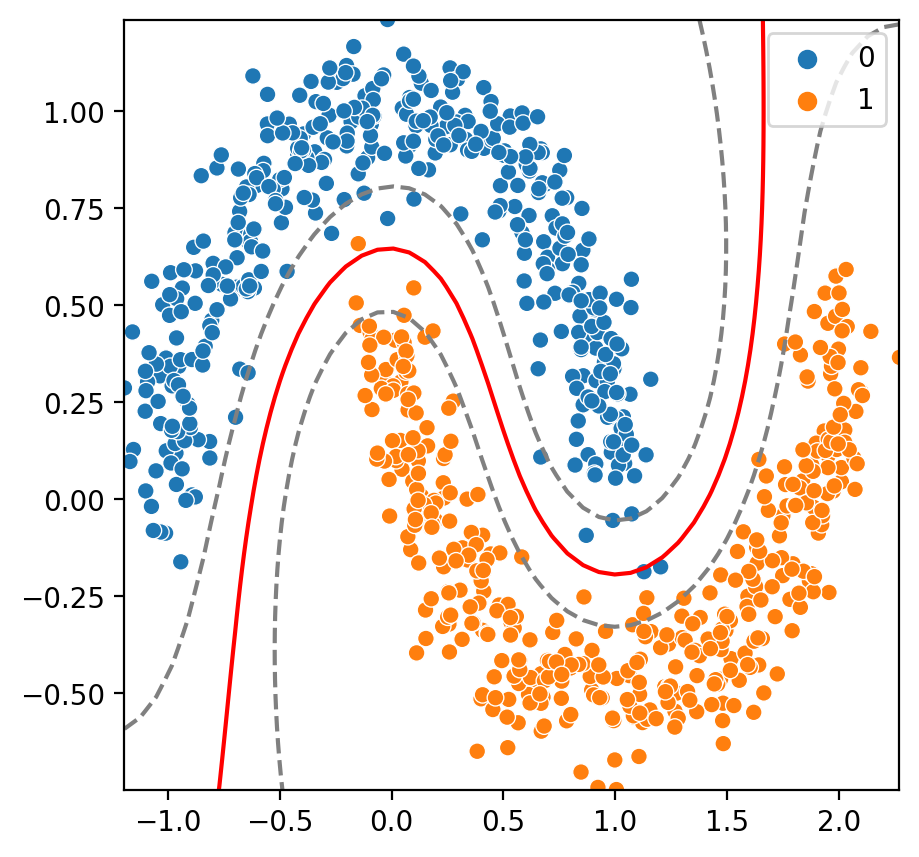

In [22]:
# 모델링
model = SVC(kernel='rbf', C=10)
model.fit(x, y)

# 시각화
svc_visualize(x, y, model)

# 5. 하이퍼파라미터

* cost
    - 오류를 허용하지 않으려는 비용
    - 값이 클수록 오류를 허용하지 않기 위한 경계 생성
* gamma 
    - 결정 경계의 곡률
    - 값이 클수록 곡률 반경이 작아짐
    

**1) cost에 따른 결정 경계**

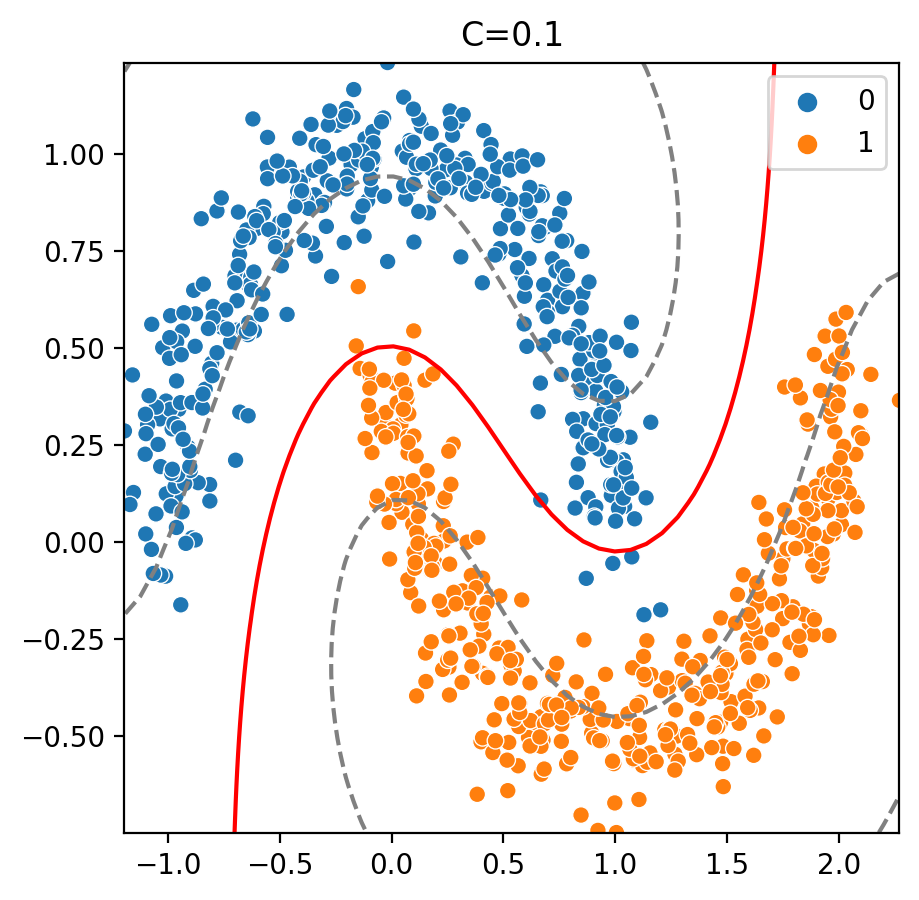

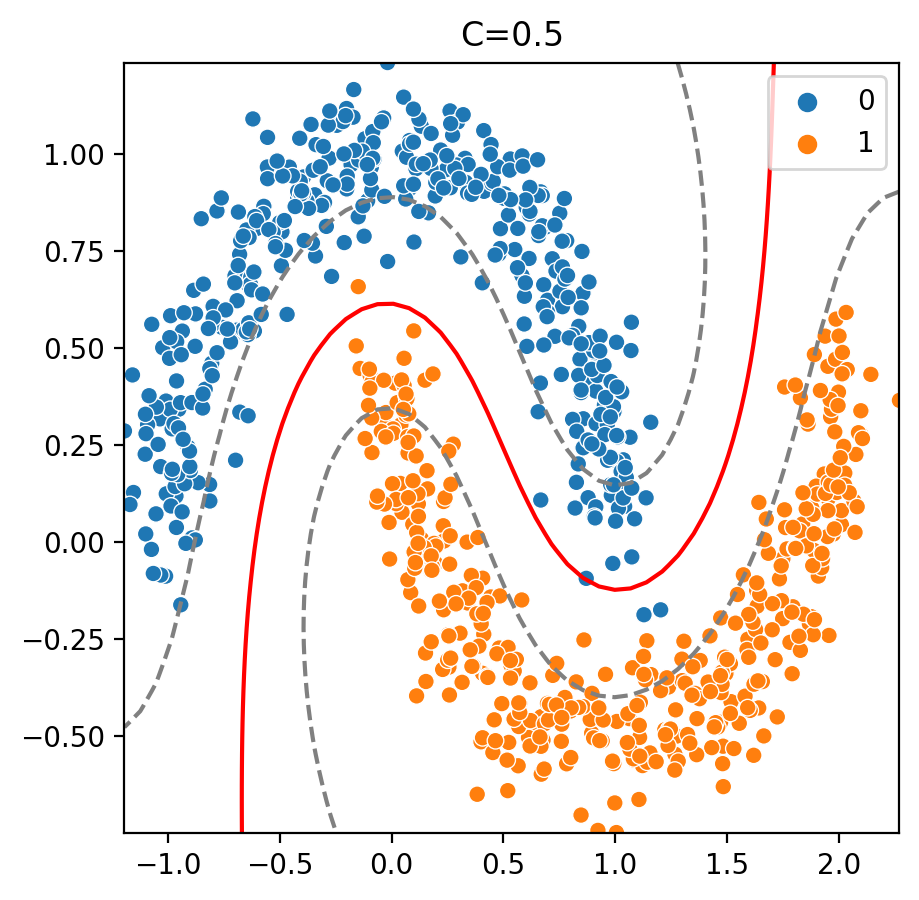

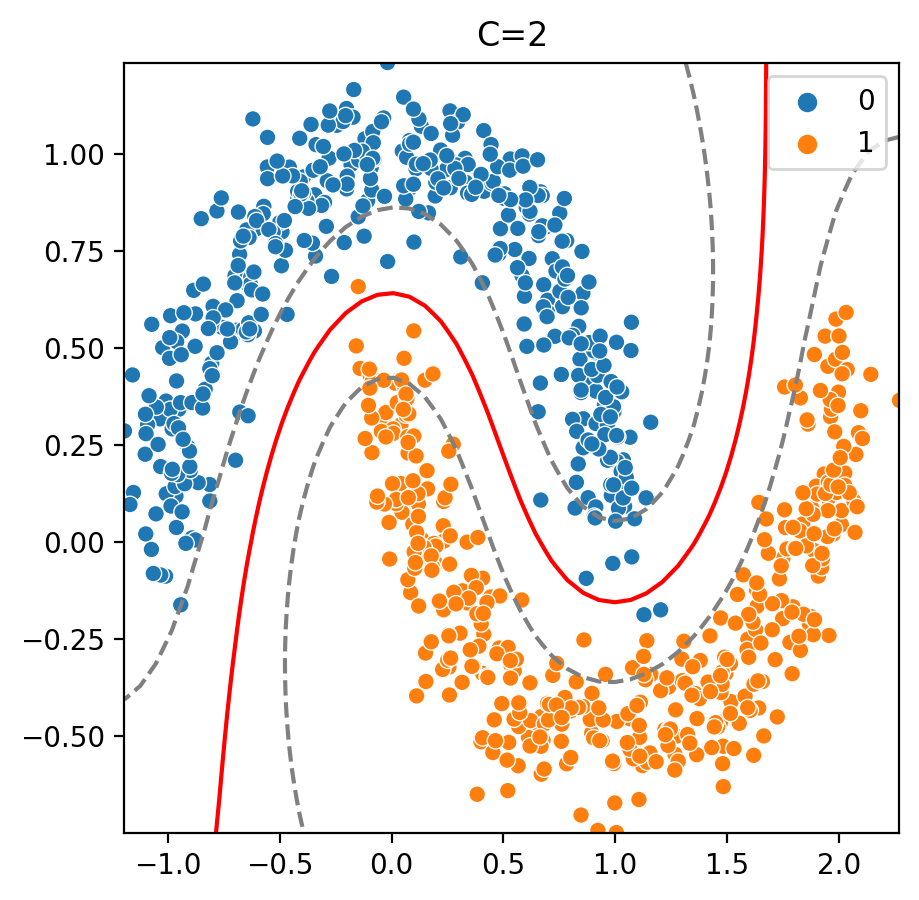

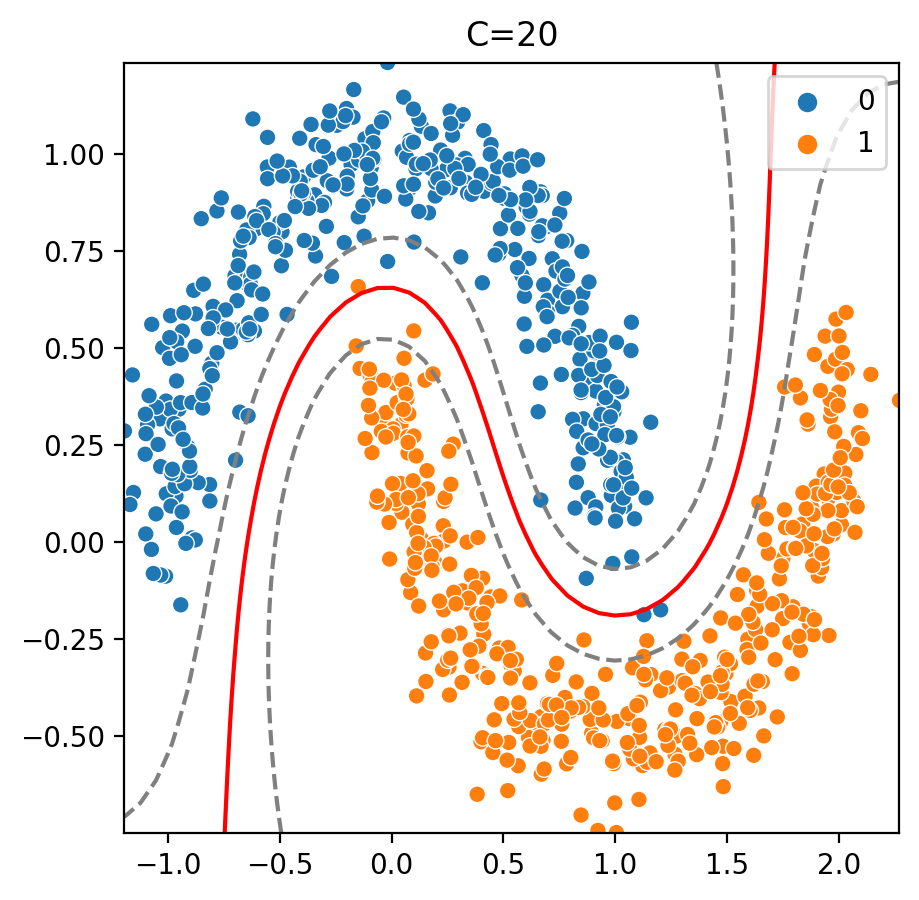

In [23]:
# cost에 따른 결정 경계
for cost in [0.1, .5, 2, 20]: 
    model = SVC(kernel='rbf', C=cost)
    model.fit(x, y)
    svc_visualize(x, y, model, f'C={cost}')

**2) gamma에 따른 결정 경계**


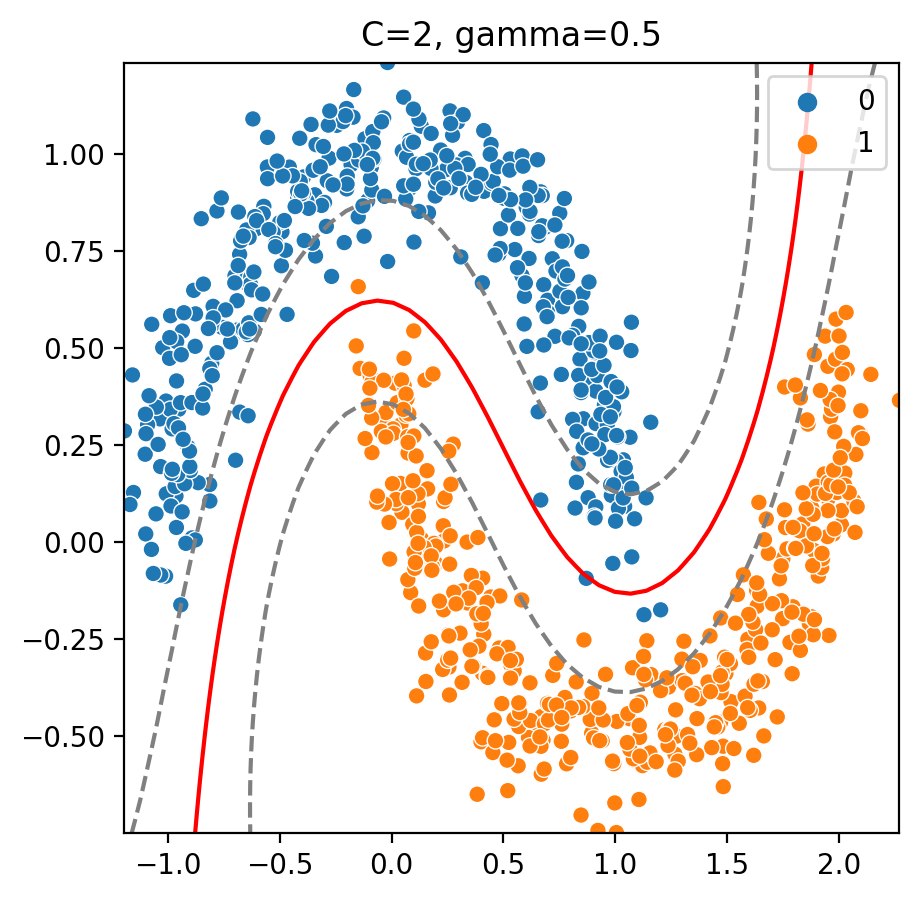

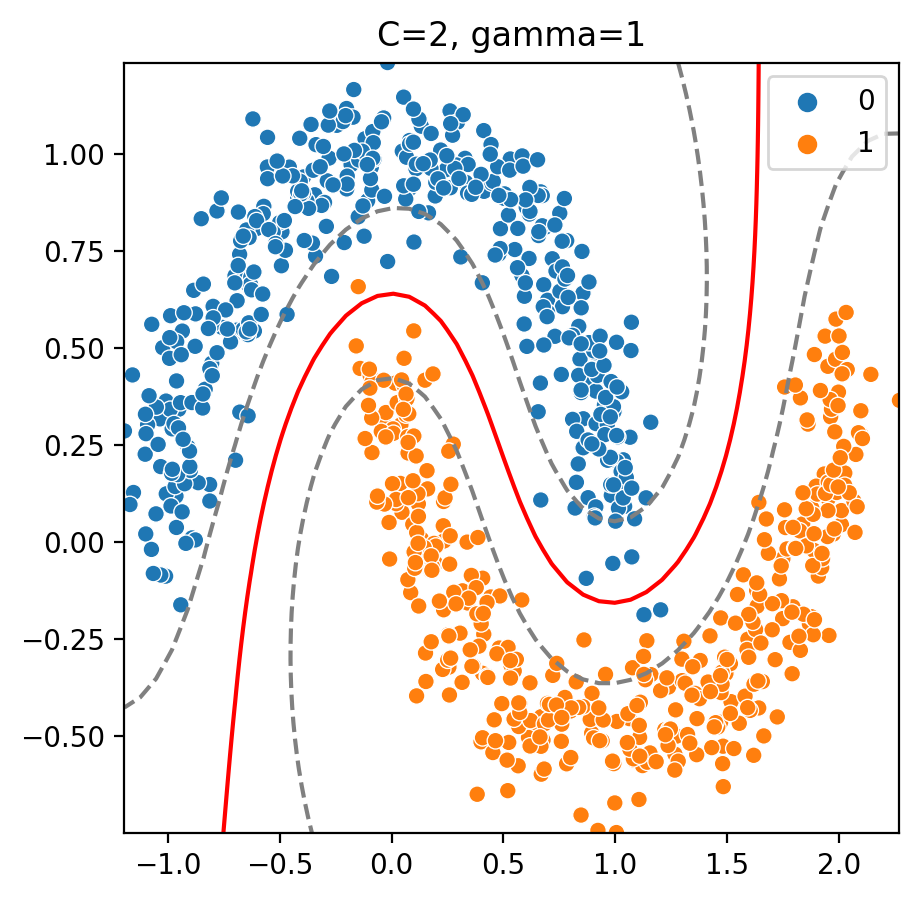

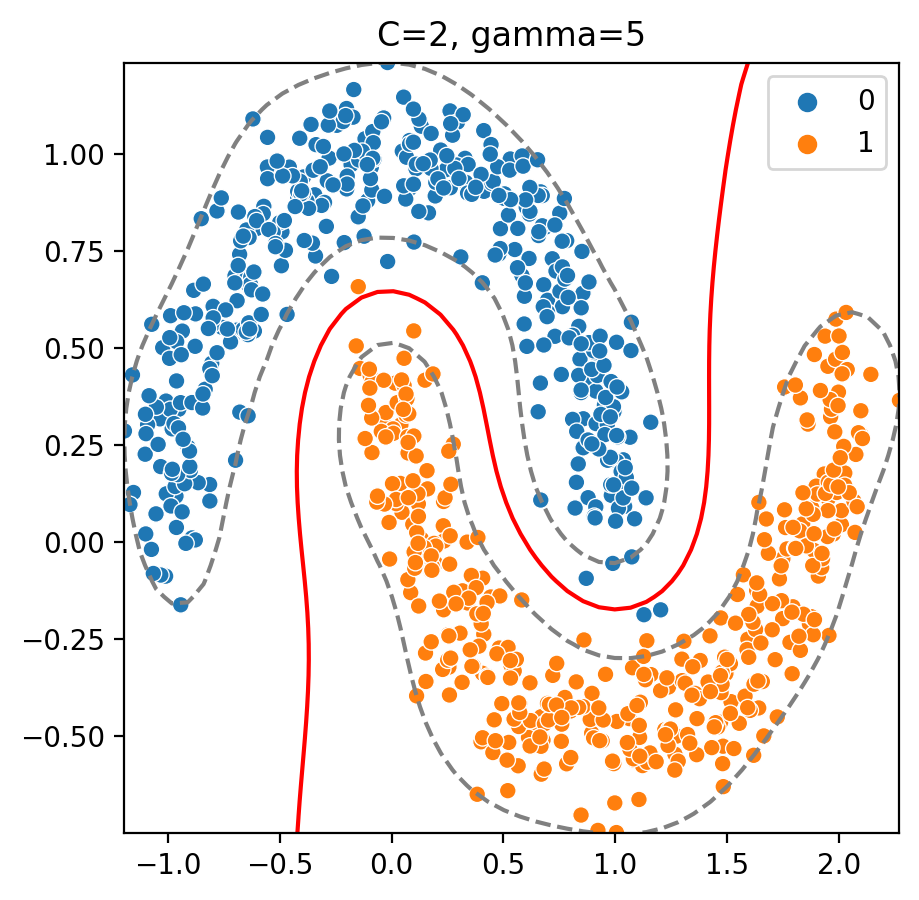

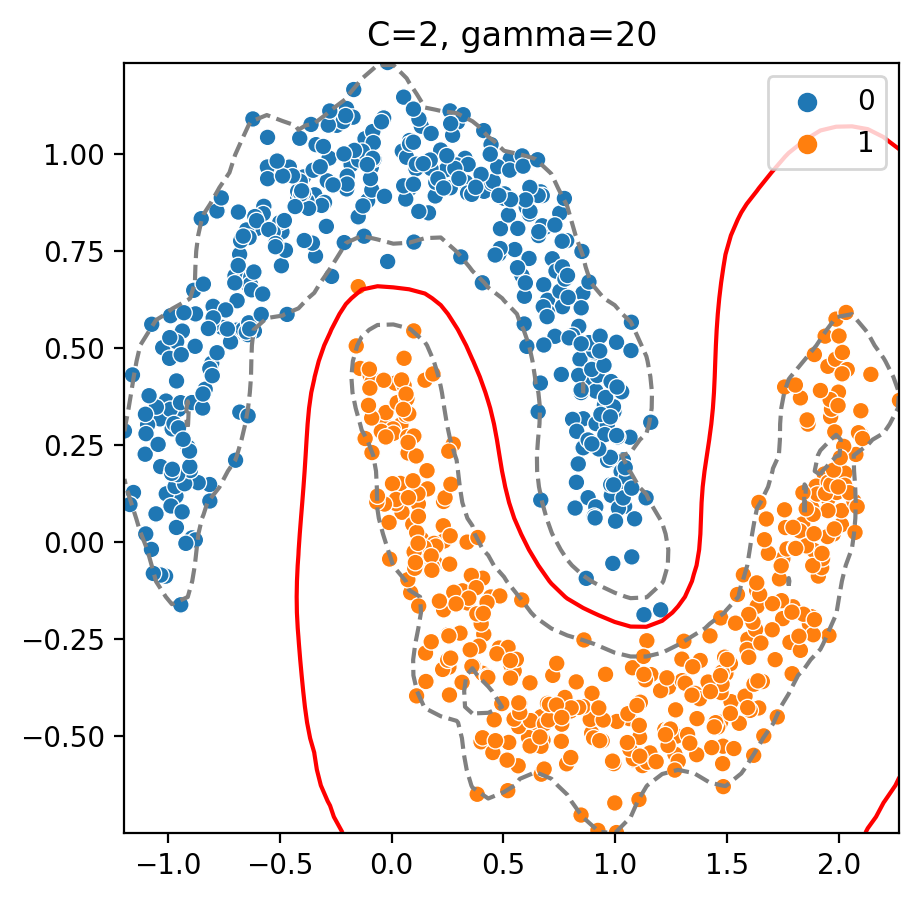

In [24]:
# gamma에 따흔 결정 경계
for g in [.5, 1, 5, 20]: 
    model = SVC(kernel='rbf', C=2, gamma=g)
    model.fit(x, y)
    svc_visualize(x, y, model, f'C=2, gamma={g}')

# 6. 회귀 모델

In [25]:
# 시각화 함수 만들기
def svr_visualize(x, y, model, title=''):
    xx = np.linspace(x.min(), x.max(), 50)
    xx = xx.reshape((len(xx), 1))
    yy = model.predict(xx)

    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, edgecolors='w', linewidths=0.5)
    plt.plot(xx, yy, color = 'r')
    plt.plot(xx, yy + model.epsilon, color = 'gray', linestyle='--')
    plt.plot(xx, yy - model.epsilon, color = 'gray', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.axis('tight')
    plt.show()

- Sample 데이터를 만들고 시각화

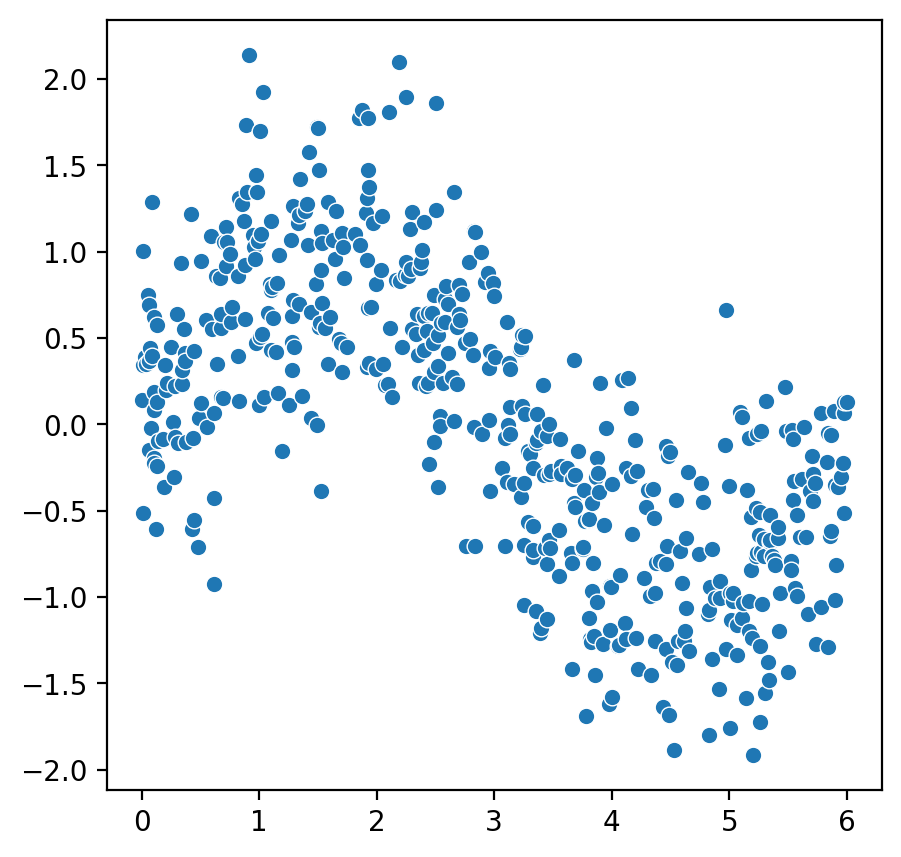

In [26]:
# 데이터 만들기
from sklearn.datasets import make_moons, make_regression

numSamples = 500
x = np.sort(6 * np.random.rand(numSamples, 1), axis=0)
y = np.sin(x).ravel()
y = y + 0.5 * (np.random.randn(numSamples))

# 시각화
plt.figure(figsize=(5, 5))
plt.scatter(x, y, edgecolors='w', linewidths=0.5)
plt.show()

- 모델을 만들고 시각화

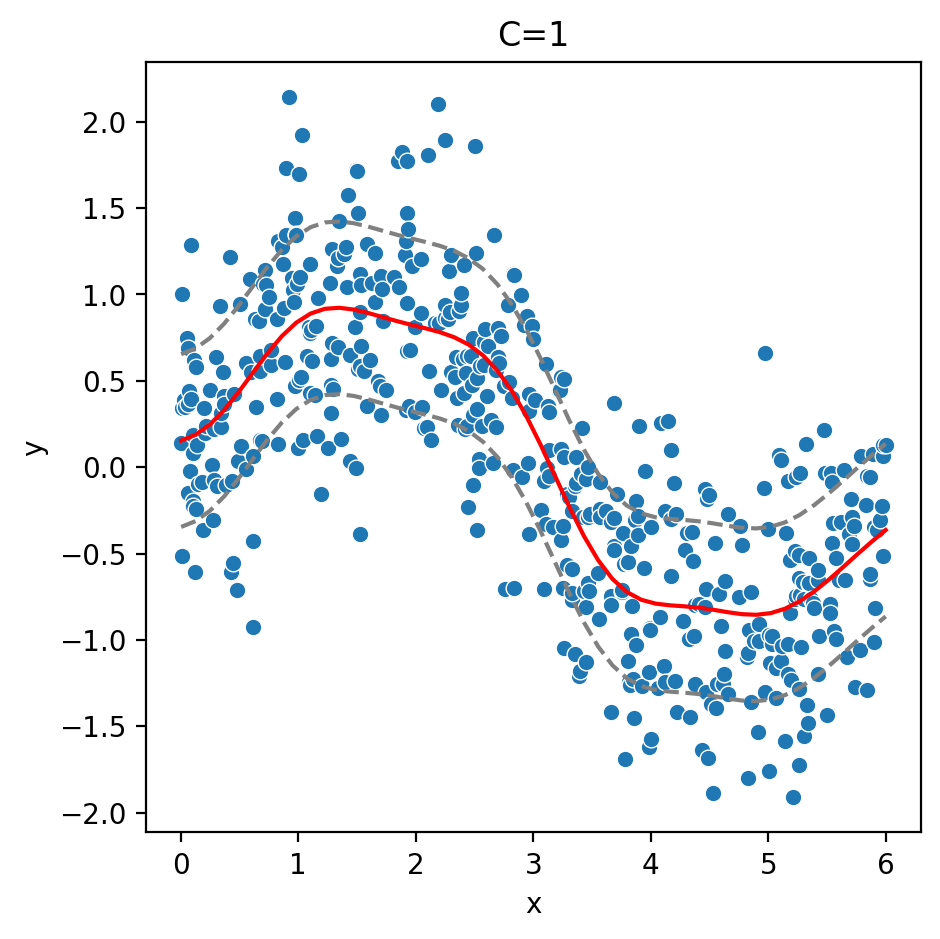

In [27]:
# 불러오기
from sklearn.svm import SVR

# 모델링
cost = 1
model = SVR(kernel='rbf', C=cost, epsilon=0.5, gamma=1)
model.fit(x, y)

# 시각화
svr_visualize(x, y, model, f'C={cost}')

- cost 변화에 따른 곡선의 변화를 확인

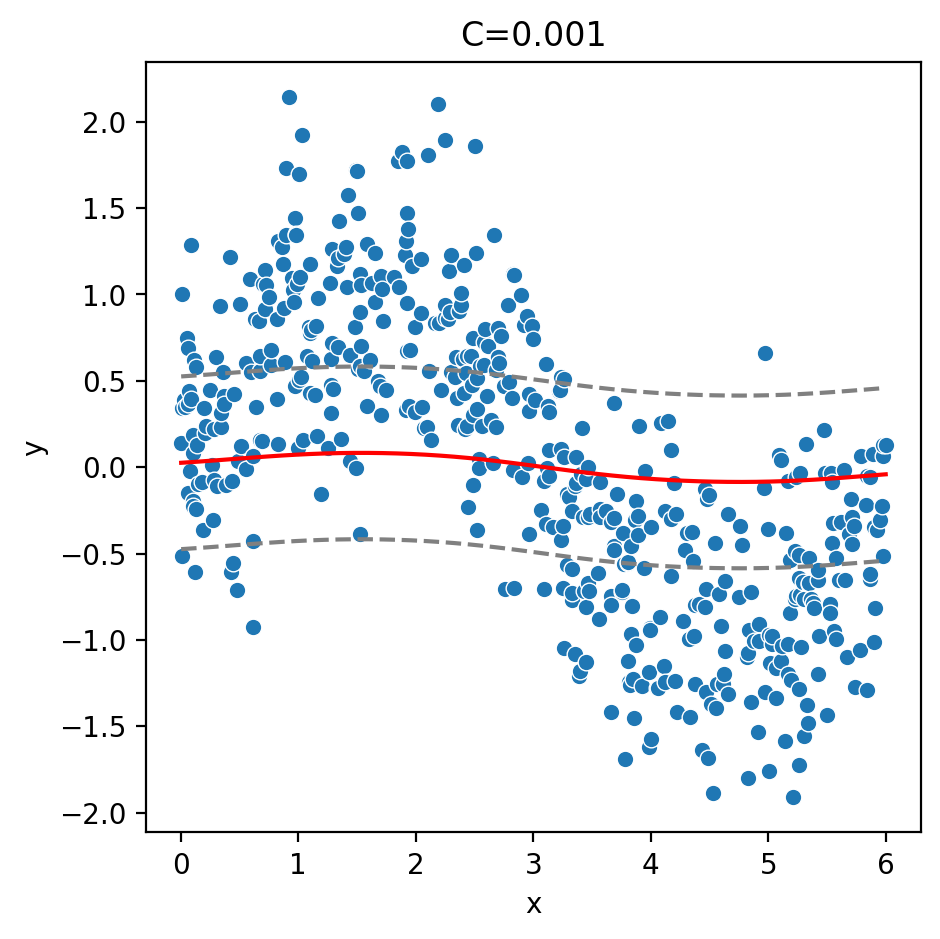

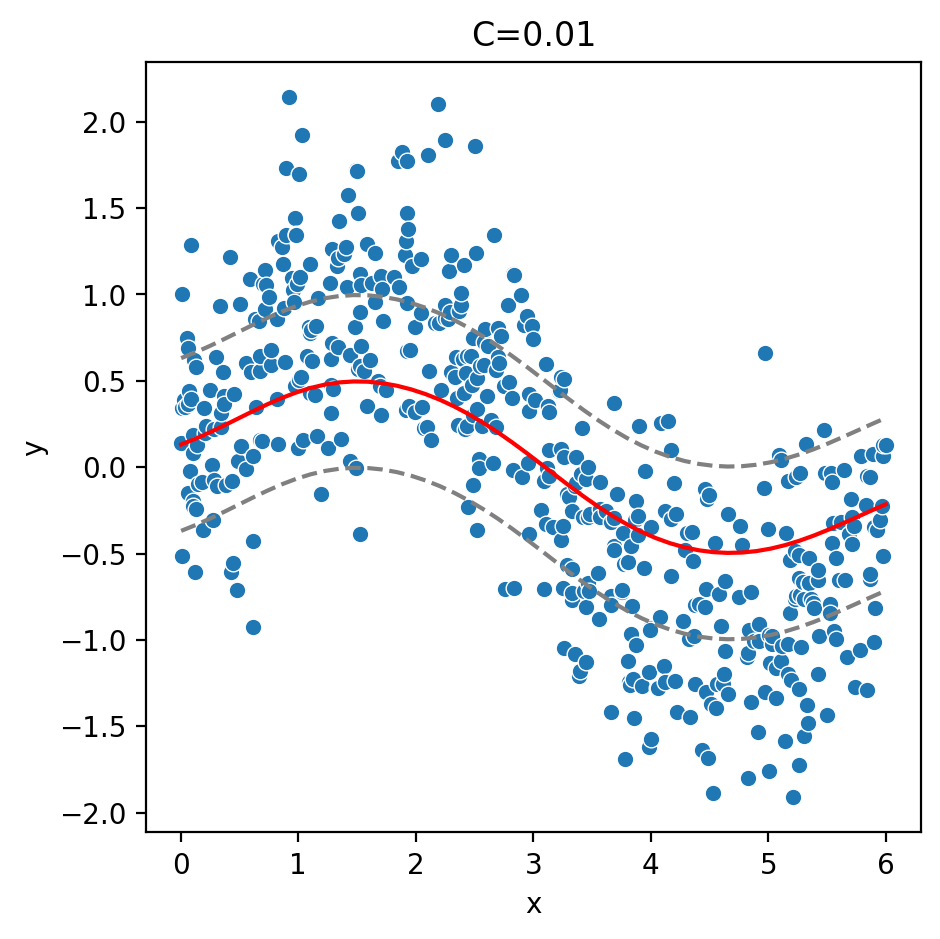

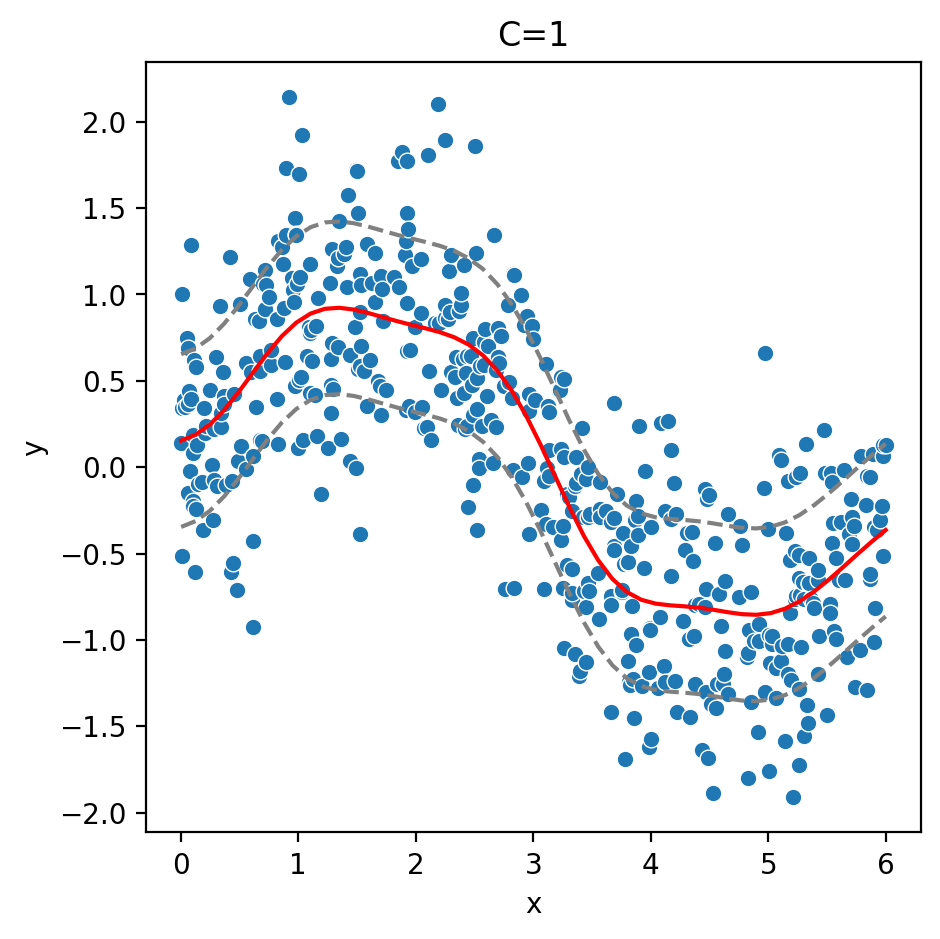

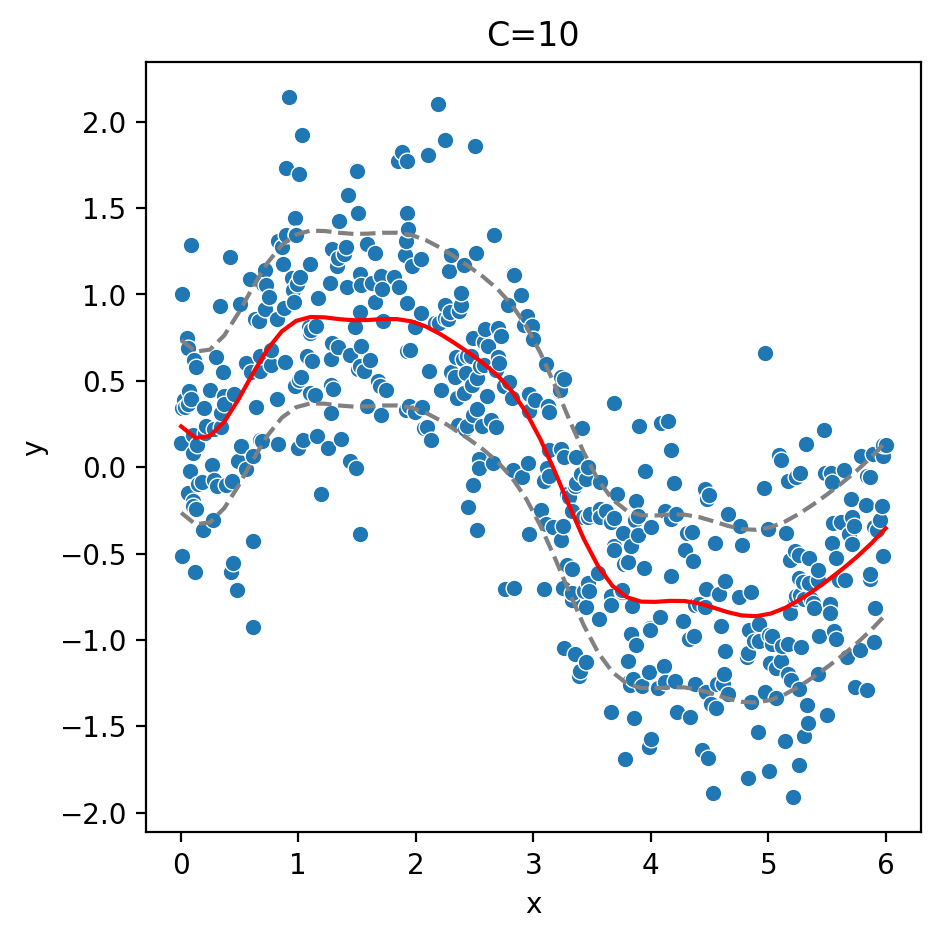

In [28]:
# cost에 따른 결정 경계
for cost in [0.001, 0.01, 1, 10]: 
    model = SVR(kernel='rbf', C=cost, epsilon=0.5, gamma=1) #회귀는 파라미터가 좀 늘어난다.
    model.fit(x, y)
    svr_visualize(x, y, model, f'C={cost}')